# Irish Pub in Toronto 

# 1. Discussion 

Toronto is a massively diverse city. Blending a variety of ethnic origins such as Chinese, English, Scottish, Portuguese, Filipino, Jamaican and our most interested origin, Irish. The Irish population of 262 965 people makes up 9,8% of the entire Toronto, earning it's place as the fourth largest ethnic origin of Toronto. Thus within toronto we will be able to find the perfect location for an Irish Pub

In this project we shall detail the entire Data Science process, step-by-step, to determine the best neighborhood in Toronto to set up our Irish Pub to maximize our exposure to the Irish population, our target audience. We can already see that we have a profitable business idea by the large target audience in Toronto, but we want to find the best place to position our Irish Pub.

# 2. Data

## 2.1 Data Sources 

a) I will be using the list of postal codes of Canada Wikipedia page to get the postal code, borough, and the name of all neighborhoods in Toronto. (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)

b) To obtain the geographical coordinates of the neighborhoods I will be using the link https://cocl.us/Geospatial_data

c) To obtain information regarding the distribution of ethnicity in the Toronto population I will be using the "Demographics of Toronto" Wikipedia page. I will be using this page to help identify the optimal neighborhood to open the Irish Pub.

(https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity)



d) To get location data (latitude and longitude), names, and categories about venues in Toronto I will be using the Foursquare API. This API gives recommendations about the venues. (https://developer.foursquare.com/docs)

Name: Name of the Venue

Latitude: The Latitude of the venue 

Longitude: The Longitude of the venue

Category: The Category of the venue

All of these were listed from the Foursquare API.



## 2.2 Data Cleaning




### 2.2 Data Cleaning
a) Scraping Toronto Neighborhoods Table from Wikipedia
Scraped the following Wikipedia page, “List of Postal code of Canada: M” in order to obtain the data about the Toronto & the Neighborhoods in it.
Assumptions made to attain the below DataFrame:
Dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only the cells that have an assigned borough will be processed. Borough that is not assigned are ignored.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
Wikipedia — package is used to scrape the data from wiki.
Image for post
Dataframe formed from the scraped wiki page
After some cleaning we got the proper dataframe with the Postal code, Borough & Neighborhood information.
Image for post
Dataframe from ‘List of Postal code of Canada: M’ Wikipedia Table.


b) Adding geographical coordinates to the neighborhoods
Next important step is adding the geographical coordinates to these neighborhoods. To do so I’m extracting the data present in the Geospatial Data csv file and I’m combining it with the existing neighborhood dataframe by merging them both based on the postal code.
Image for post
DataFrame with latitude & longitude of Postal codes in Toronto
I’m renaming the columns to match the existing dataframe formed from ‘List of Postal code of Canada: M’ wiki page.After that I’m merging both the dataframe into one by merging on the postal code.
Image for post
Merged new dataframe with info about Neighborhoods, borough, postalcode, latitude & longitude in Toronto


c) Scrap the distribution of population from Wikipedia
Another factor that can help us in deciding which neighborhood would be best option to open a pub is, the distribution of population based on the ethnic diversity for each neighborhood. As this helps us in identifying the neighborhoods which are densely populated with Irish crowd since that neighborhood would be an ideal place to open an Irish pub.
Scraped the following Wikipedia page, “Demographics of Toronto” in order to obtain the data about the Toronto & the Neighborhoods in it. Compared to all the neighborhoods in Toronto below given neighborhoods only had considerable amount of Irish crowd. We are examining those neighborhood’s population to identify the densely populated neighborhoods with Irish population.
Image for post
Scraping the wiki page
There were only six neighborhoods in Toronto which Indian population spread across so we are gathering the population, it’s percentage in each riding in those neighborhoods.
Image for post
TORONTO & EAST YORK population distribution by ethnicity
Image for post
NORTH YORK population distribution by ethnicity
Image for post
SCARBOROUGH population distribution by ethnicity
Image for post
ETOBICOKE & YORK population distribution by ethnicity

d) Get location data using Foursquare
Foursquare API is very useful online application used my many developers & other applications like Uber etc. In this project I have used it to retrieve information about the places present in the neighborhoods of Toronto. The API returns a JSON file and we need to turn that into a data-frame. Here I’ve chosen 100 popular spots for each neighborhood within a radius of 1km.
Image for post
Dataframe with venues in each neighborhood along with the category info of the venues.

In [1]:
#import libraries
import numpy as np    
import pandas as pd
from bs4 import BeautifulSoup
import requests
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium 

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::numpy==1.15.1=py37h6a91979_0
  - defaults/osx-64::dask==0.19.1=py37_0
  - defaults/osx-64::anaconda==5.3.0=py37_0
  - defaults/osx-64::mkl_fft==1.0.4=py37h5d10147_1
  - defaults/osx-64::scikit-learn==0.19.2=py37h4f467ca_0
  - defaults/osx-64::bottleneck==1.2.1=py37h1d22016_1
  - defaults/osx-64::h5py==2.8.0=py37h878fce3_3
  - defaults/osx-64::statsmodels==0.9.0=py37h1d22016_0
  - defaults/osx-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/osx-64::scipy==1.1.0=py37h28f7352_1
  - defaults/osx-64::matplotlib==2.2.3=py37h54f8f79_0
  - defaults/osx-64::bkcharts==0.2=py37_0
  - defaults/osx-64::pywavelets==1.0.0=py37h1d22016_0
  - defaults/osx-64::patsy==0.5.0=py37_0
  - defaults/osx-64::imageio==2.4.1=py37_0
  - defaults/osx-64::mkl_random==1.0.1=py37h5d10147_1
  - defaults/osx-64::numpy-base==1.15.1=py37h8a80b8c_

In [20]:
#intialize the url 
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

#scrape the table from the url
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')

#structure table into dataframe
M_table = soup.find('table',attr={})
df = (pd.read_html(str(M_table),header=0))
df = pd.DataFrame(df[0])
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [19]:
df = df[~df.Borough.str.contains("Not assigned") == True]
df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [23]:
#Read in CSV Geospatial Data
geo = pd.read_csv('https://cocl.us/Geospatial_data')
geo = pd.DataFrame(geo)
#Join on Postal Code
df_full = pd.merge(df, geo, on='Postal Code')
df_full.head(5)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [27]:
toronto_data = df_full

In [28]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_data['Borough'].unique()),
        toronto_data.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


In [29]:
address = 'Toronto, TO'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 43.6534817, -79.3839347.


In [30]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_full['Latitude'], df_full['Longitude'], df_full['Borough'], df_full['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [31]:
#Make this Notebook Trusted to load map: File -> Trust Notebook

CLIENT_ID = 'R2SKZEG4N3CRGXASAWDWYXGW5QP1TYJKOQBA4CTG3HGQE34L' # your Foursquare ID
CLIENT_SECRET = 'VSAEALMGEQHQ3DNANCC5WQ4WWIJUFV24EZ54Z5VKMMROTMHY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R2SKZEG4N3CRGXASAWDWYXGW5QP1TYJKOQBA4CTG3HGQE34L
CLIENT_SECRET:VSAEALMGEQHQ3DNANCC5WQ4WWIJUFV24EZ54Z5VKMMROTMHY


In [32]:
toronto_data.loc[0, 'Neighbourhood']

neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


In [33]:
LIMIT=100
radius=500


url = url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

In [34]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [35]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,Variety Store,Food & Drink Shop,43.751974,-79.333114


In [36]:
print('{} venues in {} were returned by Foursquare.'.format(nearby_venues.shape[0], neighborhood_name))

2 venues in Parkwoods were returned by Foursquare.


In [37]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [38]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [40]:
# one hot encoding
toronto_dummy = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_dummy['Neighborhood'] = toronto_venues['Neighborhood'] 

#print(toronto_dummy)
# move neighborhood column to the first column
fixed_columns = [toronto_dummy.columns[-1]] + list(toronto_dummy.columns[:-1])
toronto_dummy = toronto_dummy[fixed_columns]

toronto_dummy.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
t_grouped = toronto_dummy.groupby('Neighborhood').mean().reset_index()
print(t_grouped)
print(toronto_venues['Venue Category'].value_counts())
toronto_venues[toronto_venues['Venue Category']=='Pub']

                                         Neighborhood  Yoga Studio  \
0                                           Agincourt     0.000000   
1                              Alderwood, Long Branch     0.000000   
2     Bathurst Manor, Wilson Heights, Downsview North     0.000000   
3                                     Bayview Village     0.000000   
4                   Bedford Park, Lawrence Manor East     0.000000   
5                                         Berczy Park     0.000000   
6                         Birch Cliff, Cliffside West     0.000000   
7        Brockton, Parkdale Village, Exhibition Place     0.041667   
8   Business reply mail Processing Centre, South C...     0.062500   
9   CN Tower, King and Spadina, Railway Lands, Har...     0.000000   
10                                Caledonia-Fairbanks     0.000000   
11              Canada Post Gateway Processing Centre     0.000000   
12                                          Cedarbrae     0.000000   
13                  

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
14,"Regent Park, Harbourfront",43.654260,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
38,"Regent Park, Harbourfront",43.654260,-79.360636,Mill St. Brew Pub,43.650353,-79.358489,Pub
40,"Regent Park, Harbourfront",43.654260,-79.360636,The Aviary,43.653634,-79.354662,Pub
218,Glencairn,43.709577,-79.445073,"Chalker's Pub, Billiards and Bistro",43.705747,-79.442378,Pub
357,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
409,Berczy Park,43.644771,-79.373306,Flatiron & Firkin,43.648480,-79.374109,Pub
957,"The Danforth West, Riverdale",43.679557,-79.352188,The Auld Spot Pub,43.677335,-79.353130,Pub
992,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,Walrus Pub & Beer Hall,43.647375,-79.379515,Pub
1124,"India Bazaar, The Beaches West",43.668999,-79.315572,Murphy's Law,43.667319,-79.312656,Pub
1151,"Commerce Court, Victoria Hotel",43.648198,-79.379817,Walrus Pub & Beer Hall,43.647375,-79.379515,Pub


There are 23 Pubs in all of Toronto, and We Can see that Stout Irish Pub exists in St.James Town, Cabbagetown

In [42]:
num_top_venues = 5

for hood in t_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = t_grouped[t_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0               Skating Rink   0.2
1  Latin American Restaurant   0.2
2                     Lounge   0.2
3             Clothing Store   0.2
4             Breakfast Spot   0.2


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.29
1             Gym  0.14
2     Coffee Shop  0.14
3  Sandwich Place  0.14
4             Pub  0.14


----Bathurst Manor, Wilson Heights, Downsview North----
              venue  freq
0              Bank  0.10
1       Coffee Shop  0.10
2  Sushi Restaurant  0.05
3       Gas Station  0.05
4       Bridal Shop  0.05


----Bayview Village----
                 venue  freq
0                 Bank  0.25
1   Chinese Restaurant  0.25
2  Japanese Restaurant  0.25
3                 Café  0.25
4          Yoga Studio  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0         Coffee Shop  0.08
1          Restaurant  0.08
2      Sandwich Place  0.08
3  Italian Restaurant  0.

                venue  freq
0               Trail  0.33
1               Field  0.33
2        Hockey Arena  0.33
3      Massage Studio  0.00
4  Mexican Restaurant  0.00


----India Bazaar, The Beaches West----
                venue  freq
0                Park  0.10
1  Light Rail Station  0.05
2      Ice Cream Shop  0.05
3        Liquor Store  0.05
4      Sandwich Place  0.05


----Islington Avenue, Humber Valley Village----
                       venue  freq
0                Pizza Place   1.0
1                Yoga Studio   0.0
2             Medical Center   0.0
3         Miscellaneous Shop   0.0
4  Middle Eastern Restaurant   0.0


----Kennedy Park, Ionview, East Birchmount Park----
              venue  freq
0        Hobby Shop  0.25
1       Coffee Shop  0.25
2        Playground  0.25
3  Department Store  0.25
4            Market  0.00


----Kensington Market, Chinatown, Grange Park----
                           venue  freq
0                           Café  0.08
1                    Co

                    venue  freq
0        Greek Restaurant  0.20
1      Italian Restaurant  0.07
2             Coffee Shop  0.07
3  Furniture / Home Store  0.05
4          Ice Cream Shop  0.05


----The Kingsway, Montgomery Road, Old Mill North----
          venue  freq
0    Smoke Shop  0.33
1          Pool  0.33
2         River  0.33
3  Liquor Store  0.00
4        Lounge  0.00


----Thorncliffe Park----
               venue  freq
0     Sandwich Place  0.10
1  Indian Restaurant  0.10
2        Yoga Studio  0.05
3     Discount Store  0.05
4       Burger Joint  0.05


----Toronto Dominion Centre, Design Exchange----
                venue  freq
0         Coffee Shop  0.13
1               Hotel  0.07
2                Café  0.06
3          Restaurant  0.04
4  Seafood Restaurant  0.03


----University of Toronto, Harbord----
            venue  freq
0            Café  0.14
1       Bookstore  0.08
2          Bakery  0.06
3  Sandwich Place  0.06
4      Restaurant  0.06


----Victoria Village----


In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = t_grouped['Neighborhood']

for ind in np.arange(t_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(t_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()





# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

merged = toronto_data.rename(columns={'Neighbourhood':'Neighborhood'})

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
merged = merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

merged.head() # check the last columns!

NameError: name 'kmeans' is not defined

In [53]:
#!conda install -c conda-forge wikipedia --yes
import wikipedia as wp
html = wp.page("Demographics of Toronto").html().encode("UTF-8")

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs:
    - wikipedia


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wikipedia-1.4.0            |             py_2          13 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          13 KB

The following NEW packages will be INSTALLED:

  wikipedia          conda-forge/noarch::wikipedia-1.4.0-py_2



wikipedia-1.4.0      | 13 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [63]:
#TORONTO & EAST YORK population distribution by ethnicity 
TEY_population_df = pd.read_html(html, header = 0)[12]
TEY_population_df = TEY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %',
                                                     '%.8':'Ethnic Origin 9 in %'})
TEY_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,Ethnic Origin 9 in %
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#NORTH YORK population distribution by ethnicity 
North_population_df = pd.read_html(html, header = 0)[13]
North_population_df = North_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
North_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [61]:
#SCARBOROUGH population distribution by ethnicity 
Scar_population_df = pd.read_html(html, header = 0)[14]
Scar_population_df = Scar_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
Scar_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#ETOBICOKE & YORK population distribution by ethnicity 
ETY_population_df = pd.read_html(html, header = 0)[15]
ETY_population_df = ETY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
ETY_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Analysis

We are going to analyse the Neighbourhoods with competition for our Pubs

In [271]:
t_pub = t_grouped[['Neighborhood', 'Pub']]
#t_pub.columns= [['','Neighbourhood', 'Pub']]
t_pub = pd.DataFrame(t_pub)
t_pub

,Neighborhood,Pub
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.142857
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.041667
5,Berczy Park,0.017544
6,"Birch Cliff, Cliffside West",0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.000000
8,"Business reply mail Processing Centre, South C...",0.000000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000


In [98]:
#rename column so they match
toronto_data.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
#merge tables
t_merged = pd.merge(toronto_data, t_pub, on='Neighborhood')
t_merged

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Pub
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.000000
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.000000
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.069767
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.000000
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.000000
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,0.000000
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0.000000
7,M3B,North York,Don Mills,43.745906,-79.352188,0.000000
8,M3C,North York,Don Mills,43.725900,-79.340923,0.000000
9,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,0.000000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


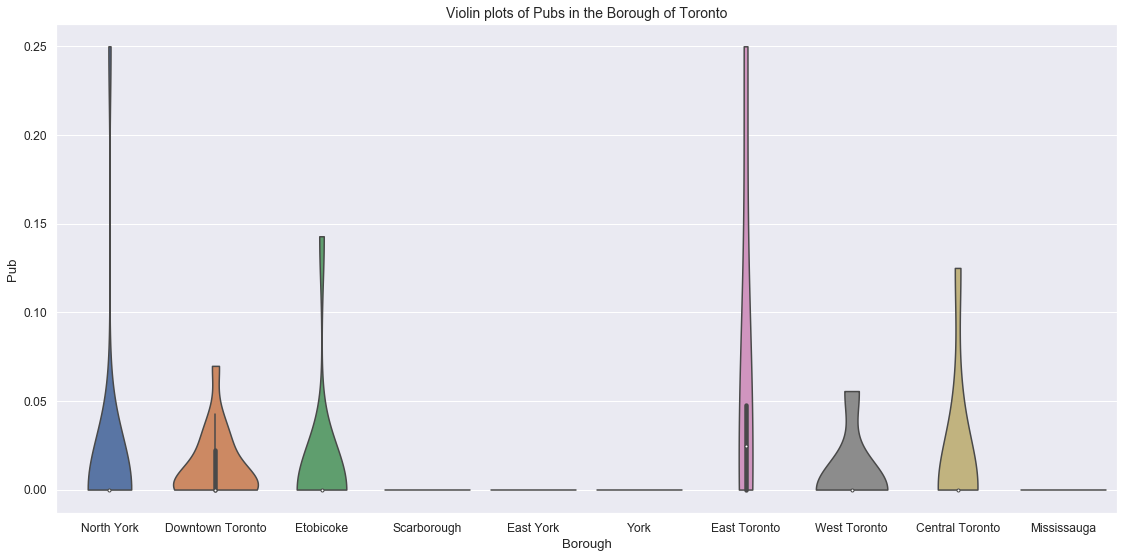

In [102]:
# Let's try Categorical plot 

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(19,9))

sns.set(font_scale=1.1)
sns.violinplot(y="Pub", x="Borough", data=t_merged, cut=0);

plt.title('Violin plots of Pubs in the Borough of Toronto', fontsize=14)
plt.show()

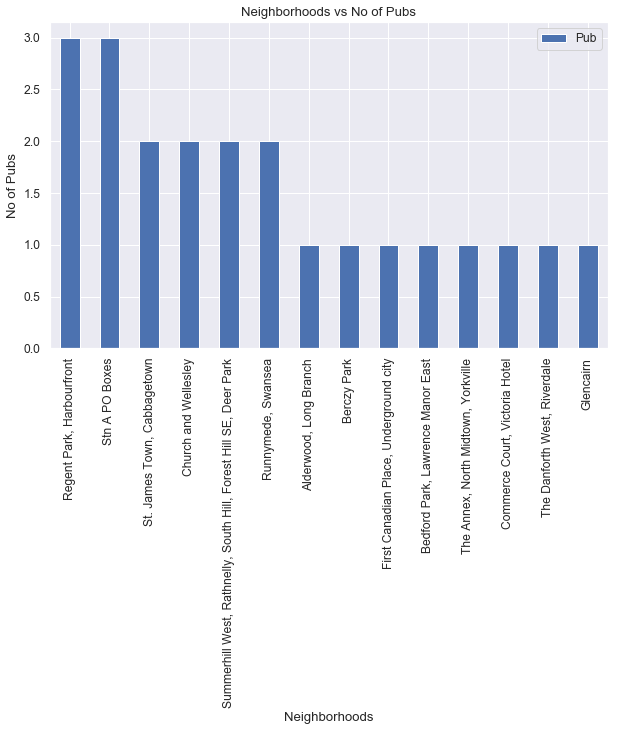

In [103]:
graph = pd.DataFrame(toronto_dummy.groupby('Neighborhood')['Pub'].sum())
graph = graph.sort_values(by ='Pub', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(10,6))
plt.xlabel("Neighborhoods")
plt.ylabel("No of Pubs")
plt.title("Neighborhoods vs No of Pubs")
plt.show()

In [104]:
#Merge all the population table with the ethnic percentage by neighborhood
ET = ETY_population_df.append(TEY_population_df,sort=True).reset_index()
ET.drop('index',axis=1,inplace=True)
SN = North_population_df.append(Scar_population_df,sort=True).reset_index()
SN.drop('index',axis=1,inplace=True)
pop_ethnic_df = SN.append(ET,sort=True).reset_index()
pop_ethnic_df.drop('index',axis=1,inplace=True)
pop_ethnic_df = pop_ethnic_df[['Riding', 'Population','Ethnic Origin #1', 'Ethnic Origin 1 in %','Ethnic Origin #2', 'Ethnic Origin 2 in %',
                               'Ethnic Origin #3','Ethnic Origin 3 in %','Ethnic Origin #4', 'Ethnic Origin 4 in %','Ethnic Origin #5','Ethnic Origin 5 in %', 
                               'Ethnic Origin #6','Ethnic Origin 6 in %','Ethnic Origin #7', 'Ethnic Origin 7 in %','Ethnic Origin #8', 'Ethnic Origin 8 in %',
                               'Ethnic Origin #9','Ethnic Origin 9 in %',
                              ]]
pop_ethnic_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,Ethnic Origin 9 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4,NaN,NaN
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.00,Filipino,7.8,NaN,NaN,NaN,NaN
7,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.00,NaN,NaN,NaN,NaN,NaN,NaN
8,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.20,Chinese,7.2,NaN,NaN,NaN,NaN
9,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
#Filtering the riding with the Irish population
temp = pop_ethnic_df.loc[(pop_ethnic_df['Ethnic Origin #1'] == 'Irish')| 
                                      (pop_ethnic_df['Ethnic Origin #2'] == 'Irish')|
                                      (pop_ethnic_df['Ethnic Origin #3'] == 'Irish')|
                                      (pop_ethnic_df['Ethnic Origin #4'] == 'Irish')|
                                      (pop_ethnic_df['Ethnic Origin #5'] == 'Irish')|
                                      (pop_ethnic_df['Ethnic Origin #6'] == 'Irish')|
                                      (pop_ethnic_df['Ethnic Origin #7'] == 'Irish')|
                                      (pop_ethnic_df['Ethnic Origin #8'] == 'Irish')|
                                      (pop_ethnic_df['Ethnic Origin #9'] == 'Irish')]
irish_df = pd.DataFrame(temp).reset_index()

irish_df.drop('index',axis=1,inplace=True)

irish_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,Ethnic Origin 9 in %
0,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4,NaN,NaN
1,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.00,Filipino,7.8,NaN,NaN,NaN,NaN
3,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.20,Chinese,7.2,NaN,NaN,NaN,NaN
4,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.40,Scottish,7.2,Irish,7.0,NaN,NaN
5,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.10,Ukrainian,7.6,German,7.1,NaN,NaN
6,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.10,Polish,7.4,NaN,NaN,NaN,NaN
7,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
8,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
9,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
#retaining only Irish ethnic percentage & the neighborhood name 
columns_list = irish_df.columns.tolist()
irish_with_percent = pd.DataFrame()
#removing Riding & Population from the column names list
del columns_list[0]
del columns_list[0]


for i in range(0,irish_df.shape[0]):
    for j in columns_list:
        #print(j)
        if irish_df.at[i, j] == 'Irish':
            k = columns_list.index(j) + 1
            percent_col = columns_list[k]
            irish_with_percent = irish_with_percent.append({'Riding':irish_df.at[i, 'Riding'], 'Population':irish_df.at[i, 'Population']
                                                                           , 'Ethnicity': irish_df.at[i, j], 'Percentage': irish_df.at[i, percent_col]},ignore_index=True)

irish_with_percent

,Ethnicity,Percentage,Population,Riding
0,Irish,9.2,112925.0,Eglinton-Lawrence
1,Irish,14.2,101790.0,Don Valley West
2,Irish,8.1,93170.0,Don Valley East
3,Irish,11.5,108295.0,Scarborough Southwest
4,Irish,7.0,101445.0,Scarborough-Rouge Park
5,Irish,14.4,127520.0,Etobicoke-Lakeshore
6,Irish,10.8,116055.0,Etobicoke Centre
7,Irish,14.6,114315.0,Spadina-Fort York
8,Irish,19.9,108435.0,Beaches-East York
9,Irish,11.5,107395.0,Davenport


In [162]:
#Calculate Actual Irish Population per riding
irish_with_percent['Irish Population'] = (irish_with_percent['Percentage'] * irish_with_percent['Population'])/100
irish_with_percent.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)
irish_with_percent.drop_duplicates(keep='first',inplace=True) 
irish_with_percent

,Riding,Irish Population
0,Eglinton-Lawrence,10389.100
1,Don Valley West,14454.180
2,Don Valley East,7546.770
3,Scarborough Southwest,12453.925
4,Scarborough-Rouge Park,7101.150
5,Etobicoke-Lakeshore,18362.880
6,Etobicoke Centre,12533.940
7,Spadina-Fort York,16689.990
8,Beaches-East York,21578.565
9,Davenport,12350.425


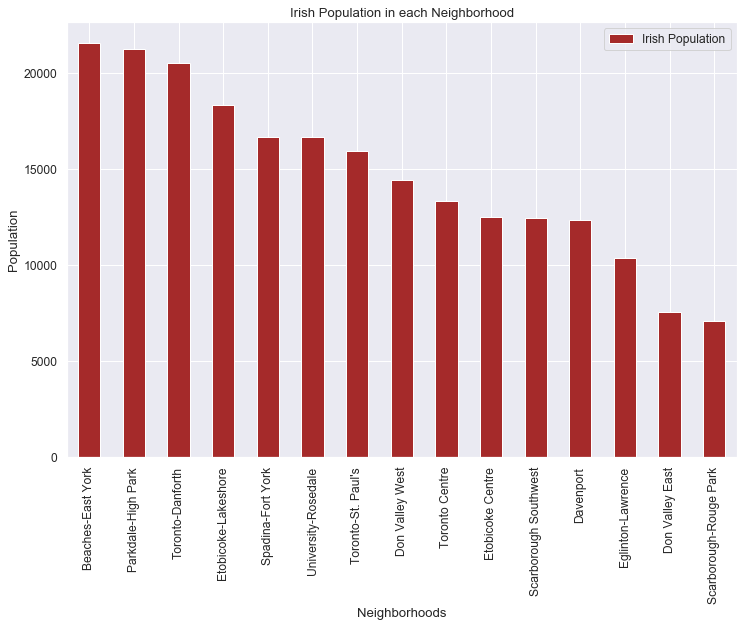

In [163]:
bar_graph = irish_with_percent.sort_values(by='Irish Population', ascending=False)
bar_graph.plot(kind='bar',x='Riding', y='Irish Population',figsize=(12,8), color='brown')
plt.title("Irish Population in each Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")
plt.show()

This analysis and visualization of the relationship between neighborhoods & Irish population present in those neighborhoods helps us in identifying the highly populated indian neighborhoods. Once we identify those neighborhoods it helps us in deciding where to place the new Indian restaurant. Irish pub placed in an densely populated Indian neighborhood is more likely to get more Irish customers than an Irish pub placed in a neighborhood with less or no Irish population. Thus this analysis helps in the determining the success of the new Irish Pub.

## Now we Asses the relationship between Irish popoulation and Areas with Pubs

In [194]:
#Altering the list to match the wikipedia page so we can retrieve the neighborhoods present in those Ridings
riding_list = irish_with_percent['Riding'].tolist()

riding_list[riding_list.index('Etobicoke Centre')] = 'Etobicoke Centre (electoral district)'
riding_list[riding_list.index('Davenport')] = 'Davenport (electoral district)'
riding_list[riding_list.index('Eglinton-Lawrence')] = 'Eglinton—Lawrence (provincial electoral district)'
riding_list

['Eglinton—Lawrence (provincial electoral district)',
 'Don Valley West',
 'Don Valley East',
 'Scarborough Southwest',
 'Scarborough-Rouge Park',
 'Etobicoke-Lakeshore',
 'Etobicoke Centre (electoral district)',
 'Spadina-Fort York',
 'Beaches-East York',
 'Davenport (electoral district)',
 'Parkdale-High Park',
 'Toronto-Danforth',
 "Toronto-St. Paul's",
 'University-Rosedale',
 'Toronto Centre']

In [195]:
#Scraping wiki page to get the neighborhoods of ech Ridings
import wikipedia

Riding_neighborhood_df = pd.DataFrame()

for item in riding_list:
    section = wikipedia.WikipediaPage(item).section('Geography')
    if section != None: 
        #print(section,'n', item)
        if section.find('neighbourhoods of') != -1:
            start = section.index('neighbourhoods of') + 17
            stop = section.index('.',start)
            neighbours = section[start:stop]
        else:
            neighbours = item + 'not none'
    else:
        neighbours = item
    Riding_neighborhood_df = Riding_neighborhood_df.append({'Riding':item, 'Neighborhoods':neighbours},ignore_index=True)
    

Riding_neighborhood_df = Riding_neighborhood_df[['Riding','Neighborhoods']]
Riding_neighborhood_df

The district includes the neighbourhoods of York Mills, Silver Hills, the western half of Don Mills, the eastern half of Lawrence Park, Leaside, and Thorncliffe Park in the City of Toronto–mostly in the former municipalities of North York and East York. The area is 37 km². n Don Valley West
This riding is located in the eastern part of the North York district in Toronto. It contains the neighbourhoods of Flemingdon Park, Don Mills, Graydon Hall, Parkwoods and Victoria Village. n Don Valley East
It covers the southwestern part of the Scarborough part of Toronto.  It stretches from Lake Ontario in the south to Eglinton Avenue in the north.
It consists of the part of the City of Toronto bounded on the west by Victoria Park Avenue, on the south by Lake Ontario, on the north by Eglinton Avenue and on the east by Markham Road.
The riding includes the neighbourhoods of Birch Cliff, Oakridge, Cliffside, Kennedy Park, Clairlea, Cliffcrest and parts of Scarborough Village and the Golden Mile. n 

,Riding,Neighborhoods
0,Eglinton—Lawrence (provincial electoral district),Eglinton—Lawrence (provincial electoral district)
1,Don Valley West,"York Mills, Silver Hills, the western half of..."
2,Don Valley East,"Flemingdon Park, Don Mills, Graydon Hall, Par..."
3,Scarborough Southwest,"Birch Cliff, Oakridge, Cliffside, Kennedy Par..."
4,Scarborough-Rouge Park,"Morningside Heights, Rouge, Port Union, West ..."
5,Etobicoke-Lakeshore,Etobicoke-Lakeshorenot none
6,Etobicoke Centre (electoral district),"Eatonville (part), Islington-City Centre West..."
7,Spadina-Fort York,Spadina-Fort York
8,Beaches-East York,"the Beaches, Upper Beaches, East Danforth, O'..."
9,Davenport (electoral district),"Fairbank, Oakwood-Vaughan, St"


In [233]:
Riding_neighborhood_df.loc[0][1] = 'Lawrence, York Mills, Wilson Heights, Oakwood, St. Andrew—St. Patrick and Eglinton.'
Riding_neighborhood_df.loc[9][1] = 'Fairbank, Oakwood-Vaughan, St. Clair Gardens, Corso Italia, Dovercourt Village, Bloordale Village, Bloorcourt Village, Brockton Village, the Junction Triangle and Western Rua Acores.'

Eto_lake = 'Mimico, New Toronto, Long Branch, Alderwood and Humber Bay'
Toronto_centre = 'Regent Park, St. James Town, Cabbagetown, Church and Wellesley, Ryerson University, The Toronto Eaton Centre and East Bay Street.'

#https://tdndp.ca/about-the-riding/ to optain this list
T_dan = 'Greektown, Leslieville, Little India, Chinatown East, Port Lands and Riverdale'
T_st = 'Fairbank, Humewood-Cedarvale, Hillcrest-Bracondale, Wychwood Park, Davenport, Casa Loma, Forest Hill, Tarragon Village, Rathnelly, South Hill, Summerhill, Rosehill, Chaplin Estates, Deer Park and Davisville.'

Riding_neighborhood_df.loc[5][1] = Eto_lake
Riding_neighborhood_df.loc[7][1] = 'Fort York'
Riding_neighborhood_df.loc[11][1] = T_dan
Riding_neighborhood_df.loc[12][1] = T_st
Riding_neighborhood_df.loc[14][1] = Toronto_centre




Riding_neighborhood_df

,Riding,Neighborhoods
0,Eglinton—Lawrence (provincial electoral district),"Lawrence, York Mills, Wilson Heights, Oakwood,..."
1,Don Valley West,"York Mills, Silver Hills, the western half of..."
2,Don Valley East,"Flemingdon Park, Don Mills, Graydon Hall, Par..."
3,Scarborough Southwest,"Birch Cliff, Oakridge, Cliffside, Kennedy Par..."
4,Scarborough-Rouge Park,"Morningside Heights, Rouge, Port Union, West ..."
5,Etobicoke-Lakeshore,"Mimico, New Toronto, Long Branch, Alderwood an..."
6,Etobicoke Centre (electoral district),"Eatonville (part), Islington-City Centre West..."
7,Spadina-Fort York,Fort York
8,Beaches-East York,"the Beaches, Upper Beaches, East Danforth, O'..."
9,Davenport (electoral district),"Fairbank, Oakwood-Vaughan, St. Clair Gardens, ..."


In [275]:
#Merging the pop_indian_DF_with_percent dataframe containing population information with the Riding_neighborhood_df dataframe.

Neigh_pop = pd.merge(irish_with_percent, Riding_neighborhood_df, on='Riding')

Neigh_pop.drop(columns=['Riding'],inplace =True)
Neigh_pop

,Irish Population,Neighborhoods
0,14454.180,"York Mills, Silver Hills, the western half of..."
1,7546.770,"Flemingdon Park, Don Mills, Graydon Hall, Par..."
2,12453.925,"Birch Cliff, Oakridge, Cliffside, Kennedy Par..."
3,7101.150,"Morningside Heights, Rouge, Port Union, West ..."
4,18362.880,"Mimico, New Toronto, Long Branch, Alderwood an..."
5,16689.990,Fort York
6,21578.565,"the Beaches, Upper Beaches, East Danforth, O'..."
7,21289.000,High Park North and the south half of The Jun...
8,20552.025,"Greektown, Leslieville, Little India, Chinatow..."
9,15950.880,"Fairbank, Humewood-Cedarvale, Hillcrest-Bracon..."


In [276]:
Neigh_pop['split_neighborhoods'] = Neigh_pop['Neighborhoods'].str.split(',') 
Neigh_pop.drop(columns=['Neighborhoods'],inplace=True,axis=1)
Neigh_pop = Neigh_pop.split_neighborhoods.apply(pd.Series).merge(Neigh_pop, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Irish Population'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

Neigh_pop.reset_index()
Neigh_pop

,Irish Population,Neighborhood
0,14454.180,York Mills
1,7546.770,Flemingdon Park
2,12453.925,Birch Cliff
3,7101.150,Morningside Heights
4,18362.880,Mimico
5,16689.990,Fort York
6,21578.565,the Beaches
7,21289.000,High Park North and the south half of The Jun...
8,20552.025,Greektown
9,15950.880,Fairbank


In [272]:
toronto_part = t_pub
toronto_part['split_neighborhoods'] = toronto_part['Neighborhood'].str.split(',') 
toronto_part.drop(columns=['Neighborhood'],inplace=True,axis=1)
toronto_part = toronto_part.split_neighborhoods.apply(pd.Series).merge(toronto_part, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Pub'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

toronto_part.reset_index()
toronto_part

,Pub,Neighborhood
0,0.000000,Agincourt
1,0.142857,Alderwood
2,0.000000,Bathurst Manor
3,0.000000,Bayview Village
4,0.041667,Bedford Park
5,0.017544,Berczy Park
6,0.000000,Birch Cliff
7,0.000000,Brockton
8,0.000000,Business reply mail Processing Centre
9,0.000000,CN Tower


In [309]:
pop_merged_restaurant_percent = pd.merge(Neigh_pop, toronto_part, on='Neighborhood')
pop_merged_restaurant_percent

,Irish Population,Neighborhood,Cluster Labels,Pub
0,13345.060,Regent Park,6,0.069767
1,12453.925,Oakridge,0,0.000000
2,7101.150,Rouge,0,0.000000
3,7101.150,Port Union,0,0.000000
4,18362.880,Long Branch,2,0.142857
5,13345.060,Cabbagetown,3,0.042553
6,12453.925,Clairlea,0,0.000000
7,7101.150,Highland Creek,0,0.000000
8,15950.880,Rathnelly,2,0.125000
9,15950.880,South Hill,2,0.125000


We see that the Long Branch, Cabbagetown, Rathnelly, South Hill and Regent Park are worth exploring as they are our highest populated areas with Pubs already in the area. Oakridge, Clairlea are two Neighborhoods that have no pubs but a large Irish Population

After performing the data cleaning & data analysis we can identify that their no big relationship established in terms of the Irish population & the popular Pubs.
Thus this marks end of the data cleaning & analyses step in this project. Next we will look into the predictive modeling. In the predictive modelling we are going to use Clustering techniques since this is analysis of unlabelled data. K-Means clustering is used to perform the analysis of the data at hand.


# 4. Modeling

First step in K-means clustering is to identify best K value meaning the number of clusters in a given dataset. To do so we are going to use the elbow method on the Toronto dataset with Pub percentage (i.e. toronto_merged dataframe).

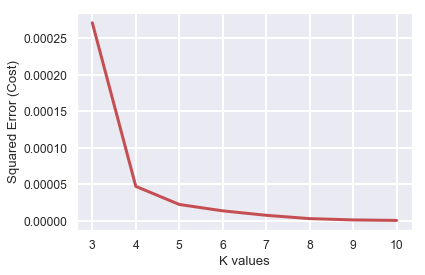

In [284]:
from sklearn.cluster import KMeans

toronto_part_clustering = toronto_part.drop('Neighborhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(toronto_part_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

We see that the lowest errors are around the K values 6, 7 and 8 onwards.

In [286]:
!conda install -c districtdatalabs yellowbrick --yes

from yellowbrick.cluster import KElbowVisualizer

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytest-4.3.1               |           py37_0         352 KB
    pytest-runner-5.2          |             py_0          13 KB
    scikit-learn-0.20.1        |   py37h4f467ca_0         5.2 MB
    yellowbrick-1.1            |           py37_0         282 KB  districtdatalabs
    ------------------------------------------------------------
                                           Total:         5.9 MB

The following NEW packages will be INSTALLED:

  pytest-runner      pkgs/main/noarch::pytest-runner-5.2-py_0
  yellowbrick        districtdatalabs/osx-64::yellowbrick-1.1-py37_0

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.6.2~ --> pkgs/main::ca-certificates-2020.6.2

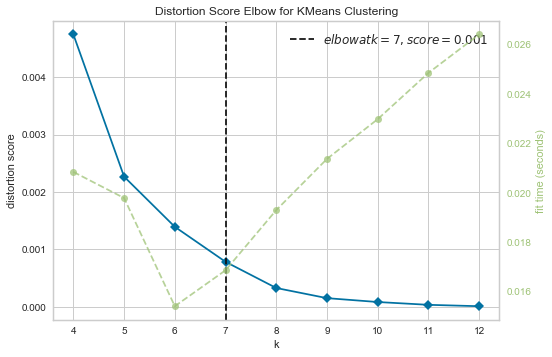

In [287]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

visualizer.fit(toronto_part_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

We see that k=7 is our best choice

In [288]:
kclusters = 7

toronto_part_clustering = toronto_part.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_part_clustering)

kmeans.labels_

array([0, 2, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 5, 0, 2, 3, 1, 5, 0, 0, 4, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 3, 0, 0, 3, 0, 2, 3, 5, 0, 4, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [292]:
#sorted_neighborhoods_venues.drop(['Cluster Labels'],axis=1,inplace=True)
toronto_part.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = toronto_data
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_part.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged.reset_index(drop=True, inplace=True)
toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Pub
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,0.00
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,0.00
2,M3B,North York,Don Mills,43.745906,-79.352188,0.0,0.00
3,M6B,North York,Glencairn,43.709577,-79.445073,1.0,0.25
4,M3C,North York,Don Mills,43.725900,-79.340923,0.0,0.00


In [310]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [322]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,Pub
0,North York,0.0,0.0
1,North York,0.0,0.0
2,North York,0.0,0.0
4,North York,0.0,0.0
5,East York,0.0,0.0
6,Downtown Toronto,0.0,0.0
8,York,0.0,0.0
11,York,0.0,0.0
12,Scarborough,0.0,0.0
13,East York,0.0,0.0


In [323]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,Pub
3,North York,1.0,0.25
9,East Toronto,1.0,0.25


### 5.1 Results:
We have reached the end of the analysis, in the result section we can document all the findinds from above clustering & visualization of the data. In this project, as the business problem started with identifying a good neighborhood to open a new Irish pub, we looked into all the neighborhoods in Toronto, analysed the Irish population in each neighborhood & spread of Irish pubs in those neighborhoods to come to conclusion about which neighborhood would be a better spot for opening a new Irish pub. I have used data from web resources like Wikipedia, geospatial coordinates of Toronto neighborhoods, and Foursquare API, to set up a very realistic data-analysis scenario. We have found out that — Cabbage Town, Rathelly, South Hill, Regent Park and Long Branch are are highly Irish Populated but they have high competing pubs

Oakridge and Clairlea are the best places to explore as they have little to no pubs and a relatively high Irish Population 

### 5.2 Discussion

Oakridge and Clairlea were selected as the best places as their apparent low competition rate and their large Irish Population. Althouhg areas like Long Branch, South Hill and Cabbage Town were highly populated they already had a large amount of competing Pubs. 


### 6. Conclusion:
Finally to conclude this project, We had the opportunity to make use of data from various sources to make a complete and thorough decision to solve the business problem of where would be the best place to open a new Irish Pub within Toronto.

We have used many python libraries to fetch the data , to manipulate the contents & to analyze and visualize those datasets. 
The Foursquare API helped us to explore the venues in enighborhoods of Toronto, then we were able to pull a large amount of data from Wikipedia which we scraped with help of Wikipedia python library, the Beautiful Soup Library and visualized using various plots present in seaborn & matplotlib. We were also able to apply a ML technique to predict the output given the data and using Folium we visualized it on a map. As an area of improvement we can explore the incomes/ average salaries of each area